In [1]:
%load_ext lab_black

from puzzles import load_puzzle_local

import numpy as np
import pandas as pd

---

# 1

In [13]:
s = load_puzzle_local(1)

In [3]:
a = [int(x) for x in s.strip().split("\n")]

In [4]:
len(a)

2000

In [5]:
s = 0
for i in range(1, len(a)):
    s += int(a[i] - a[i - 1] > 0)
s

1713

In [6]:
s = 0
for x, y in zip(a, a[1:]):
    s += int(y - x > 0)
s

1713

In [7]:
s = pd.Series(a)

(s.diff(1).fillna(-1) > 0).sum()

1713

---

In [8]:
(s.rolling(window=3).sum().dropna().diff(1).fillna(-1) > 0).sum()

1734

In [12]:
na = [a[i] + a[i - 1] + a[i - 2] for i in range(2, len(a))]

s = 0
for i in range(1, len(na)):
    s += int(na[i] - na[i - 1] > 0)
s

1734

---

# 2

In [14]:
s = load_puzzle_local(2)

In [15]:
commands = s.strip().split("\n")

In [16]:
depth = 0
position = 0

for cmd in commands:
    word, n = cmd.split()
    n = int(n)

    if word == "down":
        depth += n
    elif word == "up":
        depth -= n
    elif word == "forward":
        position += n

In [17]:
depth, position, depth * position

(927, 1850, 1714950)

Вторая часть унылая, решили не решать.

# 3

In [19]:
s = load_puzzle_local(3).strip().split("\n")

In [20]:
df = pd.DataFrame([list(x) for x in s]).astype(int)

In [21]:
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0,0,0,1,1,0,1,0,0,0,1
1,0,0,0,0,0,1,1,1,0,1,0,0
2,1,1,1,1,0,0,1,0,1,0,1,0
3,1,1,1,0,0,1,1,0,0,1,1,1
4,0,0,1,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,1,0,1,0,0,1,0,1,1,0
996,1,0,1,0,0,0,1,0,0,0,1,1
997,0,1,0,0,0,0,0,1,1,0,0,0
998,0,0,1,0,1,1,0,0,0,1,0,0


In [22]:
gamma = int("".join((df.mean(axis=0) >= 0.5).astype(int).astype(str).values), 2)
gamma

3797

In [23]:
epsilon = int("".join((df.mean(axis=0) < 0.5).astype(int).astype(str).values), 2)
epsilon

298

In [24]:
298 * 3797

1131506

In [25]:
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0,0,0,1,1,0,1,0,0,0,1
1,0,0,0,0,0,1,1,1,0,1,0,0
2,1,1,1,1,0,0,1,0,1,0,1,0
3,1,1,1,0,0,1,1,0,0,1,1,1
4,0,0,1,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,1,0,1,0,0,1,0,1,1,0
996,1,0,1,0,0,0,1,0,0,0,1,1
997,0,1,0,0,0,0,0,1,1,0,0,0
998,0,0,1,0,1,1,0,0,0,1,0,0


In [26]:
df_part = df

for c in df_part.columns:
    the_bit = int(df_part[c].mean() >= 0.5)
    df_part = df_part[df_part[c] == the_bit]
    print(
        f"The most commit bit in the next position is {the_bit} and there are {df_part.shape[0]} rows left"
    )

The most commit bit in the next position is 1 and there are 504 rows left
The most commit bit in the next position is 1 and there are 255 rows left
The most commit bit in the next position is 1 and there are 130 rows left
The most commit bit in the next position is 1 and there are 67 rows left
The most commit bit in the next position is 1 and there are 37 rows left
The most commit bit in the next position is 1 and there are 19 rows left
The most commit bit in the next position is 1 and there are 11 rows left
The most commit bit in the next position is 1 and there are 8 rows left
The most commit bit in the next position is 1 and there are 5 rows left
The most commit bit in the next position is 0 and there are 3 rows left
The most commit bit in the next position is 0 and there are 2 rows left
The most commit bit in the next position is 1 and there are 1 rows left


In [27]:
int("".join(df_part.iloc[0].astype(str).values), 2)

4089

In [28]:
df_part = df

for c in df_part.columns:
    the_bit = int(df_part[c].mean() < 0.5)
    df_part = df_part[df_part[c] == the_bit]
    print(
        f"The least commit bit in the next position is {the_bit} and there are {df_part.shape[0]} rows left"
    )
    if df_part.shape[0] == 1:
        break

The least commit bit in the next position is 0 and there are 496 rows left
The least commit bit in the next position is 1 and there are 247 rows left
The least commit bit in the next position is 1 and there are 123 rows left
The least commit bit in the next position is 1 and there are 54 rows left
The least commit bit in the next position is 1 and there are 25 rows left
The least commit bit in the next position is 0 and there are 12 rows left
The least commit bit in the next position is 0 and there are 6 rows left
The least commit bit in the next position is 0 and there are 3 rows left
The least commit bit in the next position is 0 and there are 1 rows left


In [29]:
df_part

,0,1,2,3,4,5,6,7,8,9,10,11
230,0,1,1,1,1,0,0,0,0,0,1,1


In [30]:
int("".join(df_part.iloc[0].astype(str).values), 2)

1923

In [31]:
4089 * 1923

7863147

# 4

In [32]:
class Ticket:
    def __init__(self, board):
        self.board = np.array(board)
        self.state = np.zeros_like(board)

        self.solved = False
        self.n = 0
        self.win_number = None

    def mark(self, number):
        if self.solved:
            return

        self.n += 1

        xs, ys = np.where(self.board == number)
        if len(xs) == 0:
            return

        self.state[xs, ys] = 1

        if not (
            (self.state.sum(axis=0) == 5).any() or (self.state.sum(axis=1) == 5).any()
        ):
            return

        self.solved = True
        self.win_number = number

    def score(self):
        if self.win_number is None:
            return
        xs, ys = np.where(1 - self.state)
        win_sum = self.board[xs, ys].sum()
        return self.win_number * win_sum

    def __repr__(self):
        return f"{self.board}\n\n{self.state}"

In [33]:
s = load_puzzle_local(4)

text = s.strip().split("\n")

sequence = [int(x) for x in text[0].split(",")]

tickets = [text[1:][i + 1 : i + 6] for i in range(0, len(text[1:]), 6)]
tickets = [np.array([x.split() for x in s]).astype(int) for s in tickets]
tickets = [Ticket(s) for s in tickets]

for s in sequence:
    for t in tickets:
        t.mark(s)

In [34]:
len(tickets)

100

In [35]:
tickets[np.argmin([x.n for x in tickets])].score()

25023

In [36]:
tickets[np.argmax([x.n for x in tickets])].score()

2634

---

# 6

In [37]:
s = load_puzzle_local(6)

In [38]:
def day_passed(A):
    A -= 1
    mask = A < 0
    A[mask] = 6
    new_population = np.ones(mask.sum()) * 8
    return np.concatenate([A, new_population])

In [48]:
A = np.array(s.strip().split(",")).astype(np.int64)

lengths = [len(A)]

for _ in range(80):
    A = day_passed(A)
    lengths.append(len(A))

In [49]:
import matplotlib.pyplot as plt

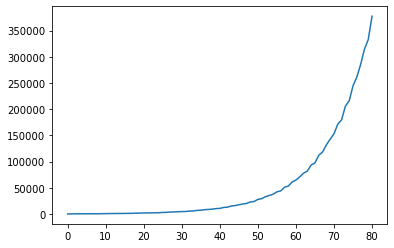

In [50]:
plt.plot(lengths)

In [51]:
len(A)

377263

---

In [52]:
from collections import Counter

In [53]:
def day_passed_better(counter):
    for i in range(0, 9):
        counter[i - 1] = counter[i]
    counter[8] = 0

    n_to_give_birth = counter[-1]
    if n_to_give_birth > 0:
        counter[6] += n_to_give_birth
        counter[8] = n_to_give_birth
    counter[-1] = 0

In [55]:
A = np.array(s.strip().split(",")).astype(np.int64)

c = Counter(A)

for _ in range(256):
    day_passed_better(c)

np.sum(list(c.values()))

1695929023803

---